# Table of Contents
 <p>

In [1]:
## Author: Saket Choudhar [saketkc\\gmail]
## License: GPL v3
## Copyright © 2017 Saket Choudhary<saketkc__AT__gmail>

%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
from matplotlib import transforms
import matplotlib.patheffects
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
from matplotlib.patches import Polygon, RegularPolygon
from matplotlib.collections import PatchCollection
import math
import numpy as np

COLOR_SCHEME = {'G': 'orange', 
                'A': 'red', 
                'C': 'blue', 
                'T': 'darkgreen'}

BASES = list(COLOR_SCHEME.keys())


ALL_SCORES1 = [[('C', 0.02247014831444764),
              ('T', 0.057903843733384308),
              ('A', 0.10370837683591219),
              ('G', 0.24803586793255664)],
             [('T', 0.046608227674354567),
              ('G', 0.048827667087419063),
              ('A', 0.084338697696451109),
              ('C', 0.92994511407402669)],
             [('G', 0.0),
              ('T', 0.011098351287382456),
              ('A', 0.022196702574764911),
              ('C', 1.8164301607015951)],
             [('C', 0.020803153636453006),
              ('T', 0.078011826136698756),
              ('G', 0.11268374886412044),
              ('A', 0.65529933954826969)],
             [('T', 0.017393530660176126),
              ('A', 0.030438678655308221),
              ('G', 0.22611589858228964),
              ('C', 0.45078233627623127)],
             [('G', 0.022364103549245576),
              ('A', 0.043412671595594352),
              ('T', 0.097349627214363091),
              ('C', 0.1657574733649966)],
             [('C', 0.03264675899941203),
              ('T', 0.045203204768416654),
              ('G', 0.082872542075430544),
              ('A', 1.0949220710572034)],
             [('C', 0.0),
              ('T', 0.0076232429756614498),
              ('A', 0.011434864463492175),
              ('G', 1.8867526364762088)],
             [('C', 0.0018955903000026028),
              ('T', 0.0094779515000130137),
              ('A', 0.35637097640048931),
              ('G', 0.58005063180079641)],
             [('A', 0.01594690817903021),
              ('C', 0.017541598996933229),
              ('T', 0.2774762023151256),
              ('G', 0.48638069946042134)],
             [('A', 0.003770051401807444),
              ('C', 0.0075401028036148881),
              ('T', 0.011310154205422331),
              ('G', 1.8624053924928772)],
             [('C', 0.036479877757360731),
              ('A', 0.041691288865555121),
              ('T', 0.072959755514721461),
              ('G', 1.1517218549109602)],
             [('G', 0.011831087684038642),
              ('T', 0.068620308567424126),
              ('A', 0.10174735408273231),
              ('C', 1.0009100180696691)],
             [('C', 0.015871770937774379),
              ('T', 0.018757547471915176),
              ('A', 0.32176408355669878),
              ('G', 0.36505073156881074)],
             [('A', 0.022798100897300954),
              ('T', 0.024064662058262118),
              ('G', 0.24571286522646588),
              ('C', 0.34070495229855319)]]

ALL_SCORES2 = [[('A', 0.01653482213365913),
              ('G', 0.026710097292833978),
              ('C', 0.035613463057111966),
              ('T', 0.057235922770358522)],
             [('C', 0.020055669245080433),
              ('G', 0.023816107228533015),
              ('A', 0.031336983195438178),
              ('T', 0.058913528407423782)],
             [('T', 0.018666958185377256),
              ('G', 0.084001311834197651),
              ('A', 0.093334790926886277),
              ('C', 0.30333807051238043)],
             [('C', 0.0),
              ('G', 0.0),
              ('A', 0.32027512306044359),
              ('T', 0.82203948252180525)],
             [('C', 0.012698627658037786),
              ('A', 0.053334236163758708),
              ('T', 0.096509570201087178),
              ('G', 0.10920819785912497)],
             [('C', 0.0),
              ('G', 0.089472611853783468),
              ('A', 0.1930724782107959),
              ('T', 0.22132698721725386)],
             [('C', 0.020962390607965918),
              ('A', 0.026202988259957396),
              ('G', 0.066380903591892068),
              ('T', 0.07336836712788071)],
             [('G', 0.0),
              ('A', 0.10236420974570831),
              ('C', 0.15354631461856247),
              ('T', 0.29173799777526871)],
             [('G', 0.027681850851852024),
              ('C', 0.089966015268519078),
              ('A', 0.089966015268519078),
              ('T', 0.53287562889815143)],
             [('A', 0.034165612000664765),
              ('C', 0.06833122400132953),
              ('G', 0.072601925501412631),
              ('T', 0.28186629900548432)],
             [('G', 0.0),
              ('A', 0.037325935579058833),
              ('C', 0.23328709736911771),
              ('T', 0.72785574379164719)],
             [('A', 0.017470244196759552),
              ('C', 0.062892879108334396),
              ('G', 0.094339318662501587),
              ('T', 0.19916078384305891)],
             [('G', 0.0),
              ('A', 0.096447131567581681),
              ('C', 0.15844885900388422),
              ('T', 0.48223565783790845)],
             [('G', 0.0),
              ('A', 0.069291952024925829),
              ('C', 0.20787585607477749),
              ('T', 0.46425607856700307)],
             [('G', 0.0),
              ('A', 0.0),
              ('C', 0.21713201856318373),
              ('T', 1.1495224512168551)],
             [('G', 0.0),
              ('A', 0.048934292002649343),
              ('T', 0.27263391258618919),
              ('C', 0.42642740173737281)],
             [('A', 0.0),
              ('G', 0.053607190685875404),
              ('C', 0.2054942309625224),
              ('T', 0.69689347891638032)],
             [('G', 0.0),
              ('A', 0.0),
              ('C', 0.31312908494534769),
              ('T', 0.84220926295645249)],
             [('G', 0.0),
              ('C', 0.068079835765814778),
              ('A', 0.068079835765814778),
              ('T', 1.3207488138568066)],
             [('G', 0.020257705570431345),
              ('A', 0.020257705570431345),
              ('C', 0.048618493369035232),
              ('T', 0.055371061892512348)],
             [('G', 0.0),
              ('A', 0.076286510680262556),
              ('C', 0.20538675952378382),
              ('T', 0.34622339462580698)]]


class Scale(matplotlib.patheffects.RendererBase):
    def __init__(self, sx, sy=None):
        self._sx = sx
        self._sy = sy

    def draw_path(self, renderer, gc, tpath, affine, rgbFace):
        affine = affine.identity().scale(self._sx, self._sy)+affine
        renderer.draw_path(gc, tpath, affine, rgbFace)



In [7]:
def draw_logo(all_scores, fontfamily='Arial', size=80):
    mpl.rcParams['font.family'] = fontfamily

    fig, ax = plt.subplots(figsize=(len(all_scores), 2.5))

    font = FontProperties()
    font.set_size(size)
    font.set_weight('bold')
    
    #font.set_family(fontfamily)

    ax.set_xticks(range(1,len(all_scores)+1))    
    ax.set_yticks(range(0,3))
    ax.set_xticklabels(range(1,len(all_scores)+1), rotation=90)
    ax.set_yticklabels(np.arange(0,3,1))    
    seaborn.despine(ax=ax, trim=True)
    
    trans_offset = transforms.offset_copy(ax.transData, 
                                          fig=fig, 
                                          x=1, 
                                          y=0, 
                                          units='dots')
   
    for index, scores in enumerate(all_scores):
        yshift = 0
        for base, score in scores:
            txt = ax.text(index+1, 
                          0, 
                          base, 
                          transform=trans_offset,
                          fontsize=80, 
                          color=COLOR_SCHEME[base],
                          ha='center',
                          fontproperties=font,

                         )
            txt.set_path_effects([Scale(1.0, score)])
            fig.canvas.draw()
            window_ext = txt.get_window_extent(txt._renderer)
            yshift = window_ext.height*score
            trans_offset = transforms.offset_copy(txt._transform, 
                                                  fig=fig,
                                                  y=yshift,
                                                  units='points')
        trans_offset = transforms.offset_copy(ax.transData, 
                                              fig=fig, 
                                              x=1, 
                                              y=0, 
                                              units='points')    
    plt.tight_layout()
    for o in fig.findobj():
        o.set_clip_on(False)
def draw_logo_mutated(all_scores, fontfamily='Arial', size=80):
    mpl.rcParams['font.family'] = fontfamily

    fig, ax = plt.subplots(figsize=(2.5*len(all_scores), 2.5))

    font = FontProperties()
    font.set_size(size)
    font.set_weight('bold')
    
    #font.set_family(fontfamily)

   
    
    trans_offset = transforms.offset_copy(ax.transData, 
                                          fig=fig, 
                                          x=2, 
                                          y=0, 
                                          units='dots')
   
    for index, scores in enumerate(all_scores):
        yshift = 0
        for base, score in scores:
            txt = ax.text(2*index+1.25, 
                          0, 
                          base, 
                          transform=trans_offset,
                          fontsize=80, 
                          color=COLOR_SCHEME[base],
                          ha='center',
                          fontproperties=font,
                         )
            txt1 = ax.text(2*index+2.3, 
                          0, 
                          base, 
                          transform=trans_offset,
                          fontsize=80, 
                          color=COLOR_SCHEME[base],
                          ha='center',
                          fontproperties=font,
                         )
            ax.axvline(x=2*index+0.8, linewidth=1, color='grey')

            v = np.array([[2*index+1.7, 0.2], [2*index+1.85,0.4], [2*index+1.7, 0.6]])
            go = Polygon(v, closed=False, fc='white', ec='black', 
                           transform=trans_offset, linewidth=1)
            ax.add_patch(go)  
            txt.set_path_effects([Scale(1.0, score)])
            txt1.set_path_effects([Scale(1.0, score)])

            go.set_path_effects([Scale(1.0, score)])

            fig.canvas.draw()
            
            window_ext = txt.get_window_extent(txt._renderer)            
            yshift = window_ext.height*score
            trans_offset = transforms.offset_copy(txt._transform, 
                                                  fig=fig,
                                                  y=yshift,
                                                  units='points')
            
           
        trans_offset = transforms.offset_copy(ax.transData, 
                                              fig=fig, 
                                              x=2, 
                                              y=0, 
                                              units='points')    
    ax.set_xticks([2*index+1.8 for index in np.arange(0, len(all_scores)+0.00)])    
    ax.set_yticks(range(0,3))
    ax.set_xticklabels(range(1,2*len(all_scores)), rotation=90)
    ax.set_yticklabels(np.arange(0,3,1))    
    seaborn.despine(ax=ax, bottom=True, trim=False)
    plt.tight_layout()
    for o in fig.findobj():
        o.set_clip_on(False)

In [8]:
def draw_conservation_scores(all_scores, conservation_scores, fontfamily='Arial', size=80):
    mpl.rcParams['font.family'] = fontfamily
    cms = mpl.cm
    maps = [cms.jet, cms.gray, cms.autumn]

    fig, ax = plt.subplots(figsize=(len(all_scores), 2.5))

    font = FontProperties()
    font.set_size(size)
    font.set_weight('bold')
    
    #font.set_family(fontfamily)

   
    
    trans_offset = transforms.offset_copy(ax.transData, 
                                          fig=fig, 
                                          x=1, 
                                          y=0, 
                                          units='dots')
   
    for index, scores in enumerate(all_scores):
        yshift = 0
        conservation_score = conservation_scores[index]
        color = maps[0](conservation_score) 
        circ = plt.Circle((index+1, -.25), 0.05, transform=trans_offset, color=color)#, r=5)
        ax.add_artist(circ)#, clip_on=False)

        for base, score in scores:
            txt = ax.text(index+1, 
                          0, 
                          base, 
                          transform=trans_offset,
                          fontsize=80, 
                          color=COLOR_SCHEME[base],
                          ha='center',
                          fontproperties=font,

                         )
            
            txt.set_path_effects([Scale(1.0, score)])
            fig.canvas.draw()
            window_ext = txt.get_window_extent(txt._renderer)
            yshift = window_ext.height*score
            trans_offset = transforms.offset_copy(txt._transform, 
                                                  fig=fig,
                                                  y=yshift,
                                                  units='points')
        trans_offset = transforms.offset_copy(ax.transData, 
                                              fig=fig, 
                                              x=1, 
                                              y=0, 
                                              units='points')    
    
    ax.tick_params(axis='x', direction='out', pad=35, length=0)
    #ax.scatter(conservation_scores, [0,0,0,0],
    #            c = conservation_scores)
    #ax.margins(x=1)
    ax.set_xmargin(1)
    ax.set_ymargin(1)
    ax.set_xticks(range(1,len(all_scores)+1))    
    ax.set_yticks(range(0,3))
    ax.set_xticklabels(range(1,len(all_scores)+1), rotation=90)
    ax.set_yticklabels(np.arange(0,3,1))    
    seaborn.despine(ax=ax, bottom=True, trim=False)
    #plt.show()
    plt.tight_layout()
    for o in fig.findobj():
        o.set_clip_on(False)

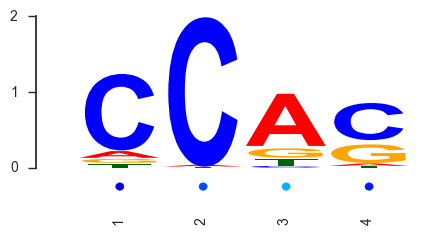

In [9]:
draw_conservation_scores(ALL_SCORES1[1:5], conservation_scores = [0.1,0.2,0.3,0.15])

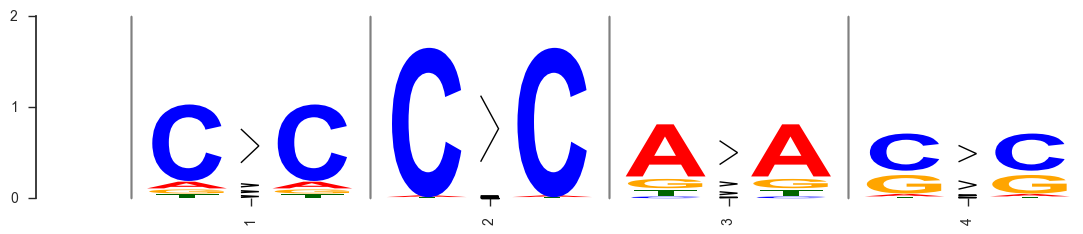

In [10]:
draw_logo_mutated(ALL_SCORES1[1:5])

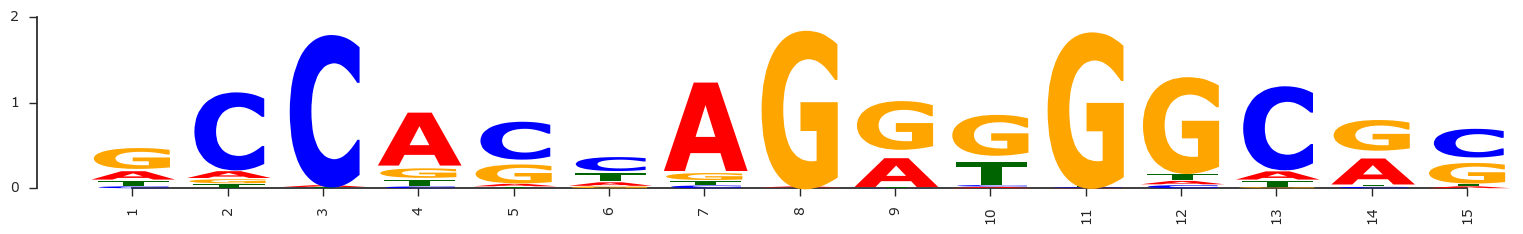

In [6]:
draw_logo(ALL_SCORES1, 'Verdana')